# Dataset analysis 

In [2]:
import SimpleITK as sitk
import numpy as np
import math
import pandas as pd
import os.path
import re
import matplotlib.pyplot as plt
from typing import List
import seaborn as sns
import json
from matplotlib import cm
from pprint import pformat

import tikzplotlib

from torchvision import transforms
from PIL import Image as Img

from IPython.display import Image 

plt.style.use("seaborn")
sns.color_palette("colorblind")

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

(301, 301)
(301, 301)


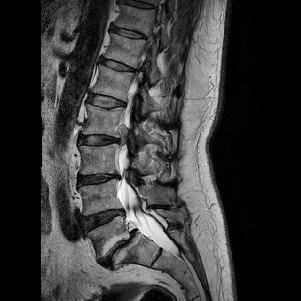

In [3]:
base_path_raw = os.path.abspath('/media/jan/USB2/')
# Make list with subdirectories
image_folders = [os.path.join(base_path_raw, o) for o in os.listdir(base_path_raw) if os.path.isdir(os.path.join(base_path_raw,o)) and not o.startswith('.')]

image_folder = image_folders[0]

slice_file = os.path.join(image_folder, 'slice_019.npy')

image = np.load(slice_file)

image = image


print(image.shape)

image = Img.fromarray((image * 255).astype('uint8')).convert('RGB')

print(image.size)

display(image)

crop 0:


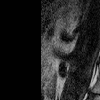

crop 1:


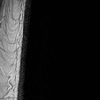

crop 2:


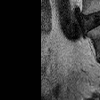

crop 3:


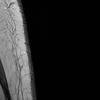

crop 4:


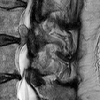

In [4]:
crops = transforms.FiveCrop((100, 100))(image)

for i, crop in enumerate(crops):
    print(f'crop {i}:')
    display(crop)

FiveCrop crops:  

0. top left  
1. top right  
2. bottom right  
3. bottom left
4. center

_Important: _ The dimension switch is integrated in the FiveCrop function!

In [5]:
crop_dim = (500, 200)
crop_nr = 1
transf_to_image = transforms.Compose([
                transforms.Lambda(lambda x : transforms.Pad((
                    max(0, math.ceil((crop_dim[1] - x.size[0]) / 2)),
                    max(0, math.ceil((crop_dim[0] - x.size[1]) / 2)) ), fill=0)(x) ),
                transforms.FiveCrop(crop_dim),
                transforms.Lambda(lambda crops: crops[crop_nr])])
transf = transforms.Compose([
                transforms.Lambda(lambda x : transforms.Pad((
                    max(0, math.ceil((crop_dim[1] - x.size[0]) / 2)),
                    max(0, math.ceil((crop_dim[0] - x.size[1]) / 2)) ), fill=0)(x) ),
                transforms.FiveCrop(crop_dim),
                transforms.Lambda(lambda crops: crops[crop_nr]),
                transforms.ToTensor()])

(200, 500)


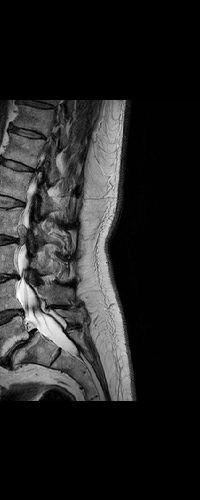

In [6]:
print(transf_to_image(image).size)

display(transf_to_image(image))

In [7]:
transf(image).shape

torch.Size([3, 500, 200])

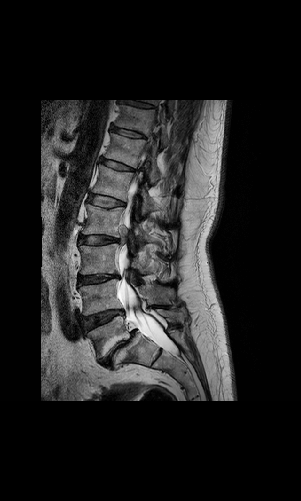

In [8]:
padded_image = transforms.Lambda(lambda x : transforms.Pad((
                    max(0, math.ceil((crop_dim[1] - x.size[0]) / 2)),
                    max(0, math.ceil((crop_dim[0] - x.size[1]) / 2)) ), fill=0)(x) )(image)
padded_image

In [9]:
padded_image.size

(301, 501)

In [10]:
(max(0, math.ceil((crop_dim[1] - image.size[0]) / 2)),max(0, math.ceil((crop_dim[0] - image.size[1]) / 2)) )

(0, 100)

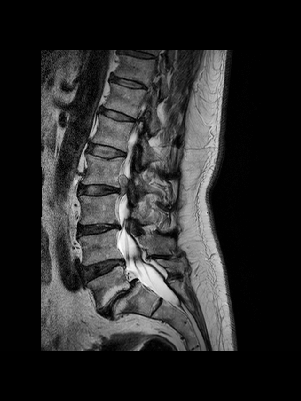

In [13]:
transforms.Lambda(lambda x : transforms.Pad((0, 50), fill=0)(x) )(image)